In [1]:
import requests
import pandas as pd
#Здесь просто превращаю данные сайта в табоицу (если перейти по ссылке, данные довольно тяжело считывать, так как значения храняться во вложенных словарях в списках)
def fetch_indicator_data(country_id, indicator_code):
    url = f"https://api.worldbank.org/v2/country/{country_id}/indicator/{indicator_code}?format=json"
    response = requests.get(url)
    data = response.json()

    indicator_data = {}
    if data[1]:
        for item in data[1]:
            year = item['date']
            value = item['value']
            indicator_data[year] = value

    return indicator_data

def get_country_data():
    country_ids = ['USA', 'CHN', 'JPN', 'DEU', 'IND', 'GBR', 'FRA', 'ITA', 'CAN', 'KOR',
               'AUS', 'RUS', 'BRA', 'ESP', 'MEX', 'IDN', 'NLD', 'SAU', 'CHE', 'TUR',
               'ARG', 'SWE', 'POL', 'BEL', 'THA', 'IRN', 'AUT', 'NOR', 'ARE', 'ISR',
               'DNK', 'ZAF', 'MYS', 'SGP', 'PHL', 'COL', 'CHL', 'FIN', 'EGY', 'PAK',
               'PRT', 'VNM', 'CZE', 'ROU', 'PER', 'GRC', 'IRL', 'NZL', 'DZA', 'QAT',
               'HUN', 'KAZ', 'UKR', 'KWT', 'MAR', 'BGD', 'IRQ', 'NGA', 'SVK', 'AGO',
               'ECU', 'LKA', 'ETH', 'OMN', 'DOM', 'KEN', 'GTM', 'PAN', 'GHA', 'MMR',
               'CUB', 'TZA', 'URY', 'PRI', 'LBN', 'CRI', 'SRB', 'LTU', 'TKM', 'JOR',
               'BGR', 'SVN', 'AZE', 'HRV', 'BOL', 'TUN', 'BLR', 'PRY', 'EST', 'LBY',
               'LVA', 'SLV', 'UZB', 'CIV', 'TTO', 'HND', 'CYP', 'LUX']

    # Создаем пустой датафрйем для хранения данных
    df = pd.DataFrame(columns=['Country', 'Country id', 'Year', 'Region', 'Income level', 'Lending type', 
                               'Longitude', 'Latitude', 'Population', "GDP", "Unemployment rate", "Inflation", 
                               "Exports of goods and services", "Imports of goods and services", "Investments",
                               "Public debt", "Consumer price indices", "Interest rates"])
    # Итерируемся по каждой стране в списке country_ids меняя в ссылке id страны, чтобы получить данные по каждой стране
    for country_id in country_ids:
        country_info_url = f"https://api.worldbank.org/v2/country/{country_id}?format=json"
        response = requests.get(country_info_url)
        country = response.json()[1][0]

        country_info = {
            "Country ID": country["id"],
            "Country Name": country["name"],
            "Region": country["region"]["value"],
            "Admin Region": country.get("adminregion", {}).get("value", None),
            "Income Level": country["incomeLevel"]["value"],
            "Lending Type": country["lendingType"]["value"],
            "Capital City": country["capitalCity"],
            "Longitude": country["longitude"],
            "Latitude": country["latitude"],
        }

        parameters = [
            {"indicator": "SP.POP.TOTL", "parameter": "Population"},
            {"indicator": "NY.GDP.MKTP.CD", "parameter": "GDP"},
            {"indicator": "SL.UEM.TOTL.ZS", "parameter": "Unemployment"},
            {"indicator": "SL.UEM.TOTL.ZS", "parameter": "Unemployment rate"},
            {"indicator": "FP.CPI.TOTL.ZG", "parameter": "Inflation"},
            {"indicator": "NE.EXP.GNFS.CD", "parameter": "Exports of goods and services"},
            {"indicator": "NE.IMP.GNFS.CD", "parameter": "Imports of goods and services"},
            {"indicator": "NE.GDI.TOTL.CD", "parameter": "Investments"},
            {"indicator": "GC.DOD.TOTL.GD.ZS", "parameter": "Public debt"},
            {"indicator": "FP.CPI.TOTL", "parameter": "Consumer price indices"},
            {"indicator": "FR.INR.RINR", "parameter": "Interest rates"},
        ]
        # тут временно храним данные по текущей стране
        df_local = pd.DataFrame(columns=['Country',
                                        'Country id',
                                        'Year',
                                        'Region',
                                        'Income level',
                                        'Lending type',
                                        'Longitude',
                                        'Latitude',
                                        'Population',
                                        "GDP",
                                        "Unemployment rate",
                                        "Inflation",
                                        "Exports of goods and services",
                                        "Imports of goods and services",
                                        "Investments",
                                        "Public debt",
                                        "Consumer price indices",
                                        "Interest rates"])
        
        for param in parameters:
            data = fetch_indicator_data(country_info["Country ID"], param["indicator"])
            country_name = country_info['Country Name']
            country_id = country_info['Country ID']
            country_region = country_info['Region']
            country_income = country_info['Income Level']
            country_lending = country_info['Lending Type']
            country_long = country_info['Longitude']
            country_lat = country_info['Latitude']
            
            df_local['Country'] = country_name
            df_local['Country id'] = country_id
            df_local['Region'] = country_region
            df_local['Income level'] = country_income
            df_local['Lending type'] = country_lending
            df_local['Longitude'] = country_long
            df_local['Latitude'] = country_lat
            if param['indicator'] == "SP.POP.TOTL":
                df_local['Year'] = list(data.keys())
            df_local[param['parameter']] = list(data.values())

    # Конкатим к общему датафрейму инфу по каждой стране отдельно (добавляем по вертикали)
        df = pd.concat([df, df_local], axis=0)
    
    return df

df = get_country_data()
df.head()
# Тут по сути закончилась самая сложная часть проекта, так как данные были беспорядочные и их было сложно воспринимать



,Country,Country id,Year,Region,Income level,Lending type,Longitude,Latitude,Population,GDP,Unemployment rate,Inflation,Exports of goods and services,Imports of goods and services,Investments,Public debt,Consumer price indices,Interest rates,Unemployment
0,United States,USA,2022,North America,High income,Not classified,-77.032,38.8895,NaN,NaN,3.611,8.002800,NaN,NaN,NaN,NaN,134.211206,NaN,3.611
1,United States,USA,2021,North America,High income,Not classified,-77.032,38.8895,331893745.0,2.331508e+13,5.350,4.697859,2.539648e+12,3.401361e+12,4.920488e+12,120.374017,124.266414,-1.189357,5.350
2,United States,USA,2020,North America,High income,Not classified,-77.032,38.8895,331501080.0,2.106047e+13,8.050,1.233584,2.148616e+12,2.776115e+12,4.433432e+12,126.232494,118.690502,2.210411,8.050
3,United States,USA,2019,North America,High income,Not classified,-77.032,38.8895,328329953.0,2.138098e+13,3.670,1.812210,2.538450e+12,3.117235e+12,4.558260e+12,100.805042,117.244195,3.427090,3.670
4,United States,USA,2018,North America,High income,Not classified,-77.032,38.8895,326838199.0,2.053306e+13,3.900,2.442583,2.538089e+12,3.131166e+12,4.354223e+12,99.060976,115.157303,2.441415,3.900


In [65]:
df.to_csv('Data for analysis')

EDA

Для начала нужно провести EDA, посмотреть на данные после парсинга. 

In [70]:
import pandas as pd

url = "https://raw.githubusercontent.com/vladimirlavrentyev/python-project-Lavrentev-Vladimir/main/Data%20for%20analysis" 
#Это было сделано для того, чтобы не выкладыватль токен в общий доступ, поэтому сохранил в csv и ссылаюсь уже на спаршеную дату
df = pd.read_csv(url)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4900 entries, 0 to 4899
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     4900 non-null   int64  
 1   Country                        4900 non-null   object 
 2   Country id                     4900 non-null   object 
 3   Year                           4900 non-null   int64  
 4   Region                         4900 non-null   object 
 5   Income level                   4900 non-null   object 
 6   Lending type                   4900 non-null   object 
 7   Longitude                      4900 non-null   float64
 8   Latitude                       4900 non-null   float64
 9   Population                     4802 non-null   float64
 10  GDP                            4356 non-null   float64
 11  Unemployment rate              4900 non-null   float64
 12  Inflation                      4160 non-null   f

Видим, что не все колонки, которые должны быть float на самом деле имеют типа float, преобразуем их

In [3]:
df['Year'] = df['Year'].astype(int)
df['Longitude'] = df['Longitude'].astype(float)
df['Latitude'] = df['Latitude'].astype(float)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4900 entries, 0 to 49
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        4900 non-null   object 
 1   Country id                     4900 non-null   object 
 2   Year                           4900 non-null   int32  
 3   Region                         4900 non-null   object 
 4   Income level                   4900 non-null   object 
 5   Lending type                   4900 non-null   object 
 6   Longitude                      4900 non-null   float64
 7   Latitude                       4900 non-null   float64
 8   Population                     4802 non-null   float64
 9   GDP                            4356 non-null   float64
 10  Unemployment rate              3132 non-null   float64
 11  Inflation                      4160 non-null   float64
 12  Exports of goods and services  4159 non-null   flo

In [5]:
df.isnull().sum()

Country                             0
Country id                          0
Year                                0
Region                              0
Income level                        0
Lending type                        0
Longitude                           0
Latitude                            0
Population                         98
GDP                               544
Unemployment rate                1768
Inflation                         740
Exports of goods and services     741
Imports of goods and services     741
Investments                       740
Public debt                      3695
Consumer price indices            713
Interest rates                   2902
Unemployment                     1768
dtype: int64

In [6]:
df.isnull().sum().sum()

14450

Видим, что за какие-то года просто не было данных для некоторых стран, не страшно

### Визулизация

In [7]:
TOKEN = open('token.txt').read()

In [8]:
import plotly.express as px
px.set_mapbox_access_token(TOKEN)

Хитмапа, наложенная на карту. Размером обозначен ввп, цветов население по странам(координаты указаны для столиц стран из списка внутри функции выше)

In [19]:
fig = px.scatter_mapbox(df.groupby(by = ['Country'])[['Longitude', 'Latitude', 'GDP', 'Population']].last().astype(float).reset_index(),
                                 lat = 'Latitude', lon = 'Longitude', color = 'Population', size = 'GDP', hover_name = 'Country', zoom = 1)
fig.show()

Добавим информацию об уровне дохода и уровне безработцы

In [18]:
df['Income level'] = df['Income level'].astype(str) #Перевели в стрингу, так как иначе данные бы не считались
df['Income level'] = df.groupby('Country')['Income level'].transform('last')
df['Unemployment rate'] = df.groupby('Country')['Unemployment rate'].transform('last')
fig = px.scatter_mapbox(df.groupby(by=['Country'])[['Longitude', 'Latitude', 'GDP', 'Population', 'Income level', 'Unemployment rate']].last().reset_index(),
                        lat='Latitude', lon='Longitude', color='Population', size='GDP',
                        hover_name='Country', hover_data=['GDP', 'Population', 'Income level', 'Unemployment rate'],
                        labels={'Income level': 'Income Level', 'Unemployment rate': 'Unemployment Rate', 'GDP': 'GDP', 'Population': 'Population'},
                        zoom=1)
# Обновление формата подсказки для каждого маркера на графике
fig.update_traces(hovertemplate="<b>%{hovertext}</b><br><br>" +
                                 "GDP: %{customdata[0]:,}<br>" +
                                 "Population: %{customdata[1]:,}<br>" +
                                 "Income Level: %{customdata[2]}<br>" +
                                 "Unemployment Rate: %{customdata[3]}")

fig.show()

### Анализ данных

Проведем анализ связи экономических показателей. Начнем с ВВП и уровнем дохода. Так как уровень дохода в данных не является числом, припишем разным уровням дохода значения.

Коэффициент корреляции между 'Income level' и 'GDP': 0.15687811097397764


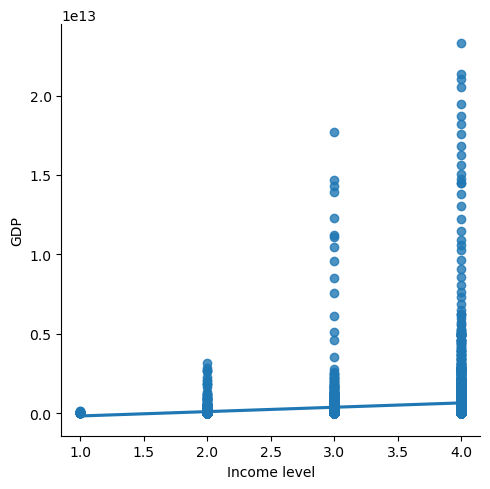

In [23]:
import seaborn as sns

data = df[['Income level', 'GDP']].dropna()
# Преобразование значений уровня дохода в числа для дальнейшего анализа
income_level_mapping = {'Low income': 1, 'Lower middle income': 2, 'Upper middle income': 3, 'High income': 4} 
data['Income level'] = data['Income level'].map(income_level_mapping)

correlation = data['Income level'].corr(data['GDP'])

sns.lmplot(x='Income level', y='GDP', data=data) # Точечный график с линейной регрессией

print(f"Коэффициент корреляции между 'Income level' и 'GDP': {correlation}")

Существует положительная корреляция между уровнем дохода и ВВП. Однако уровенль дохода является далеко не единственным фактором, влияющим на ВВП, Поэтому добавим в анализ такие параметры как инфляция, уровень безработцы и инвестиции. Построим корреляционную матрицу и посмотрим на результат. 

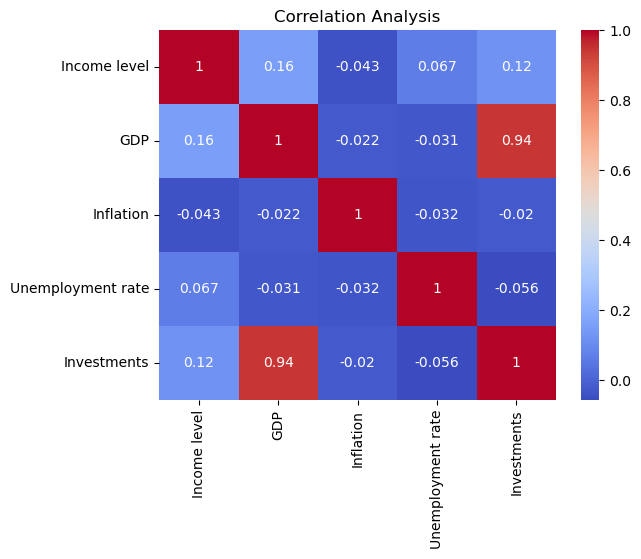

In [26]:
import matplotlib.pyplot as plt

data = df[['Income level', 'GDP', 'Inflation', 'Unemployment rate', 'Investments']].copy()
# Преобразование значений уровня дохода в числа для дальнейшего анализа
data['Income level'] = data['Income level'].map({'Low income': 1, 'Lower middle income': 2, 'Upper middle income': 3, 'High income': 4})
# Матрица корреляции между показателями
correlation_matrix = data.corr()
# Тепловая карта
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Analysis')
plt.show()

Наблюдается негативная, но не сильная корреляция между инфляцией и уровнем инвестиций . Это может указывать на то, что высокая инфляция может отталкивать инвесторов и снижать объем инвестиций в страну. Можно предположить, что стабильность цен может способствовать привлечению инвестиций и устойчивому экономическому росту.

Также можно сделать вывод о наличии положительной связи между инвестициями и ВВП. Это подтверждается значимым коэффициентом корреляции (0,94), который указывает на прямую зависимость между этими двумя переменными. Этот вывод в целом достаточно очевиден, но мы получили статистическое подтверждение.

В целом по данной корреляционной матрице сложно сделать серьезные выводы о взаимосвязи различных экономических показателей, так как исследование довольно поверхностно в силу небольшого количества рассматриваемых экономических факторов.

Давайте проведем анализ влияния внешней торговли на экономическое развитие страны. Так как стран в данных много, возьмем только топ-10 стран по ВВП. В качестве экономического показателя будем использовать торговый баланс (разницу экспорта и импорта)

Давайте выясним, какой характер имеет зависимость между торговым балансом и ВВП страны. Для этого найдем корреляцию между этими показателями для топ-трех стран по ВВП (США, Китай, Япония) и отдельно для России. Прошу заметить, что тут нет Индии просто потому что по ней не удалось получить данные. Также будет ползено указать какое место страна занимает в списке стран по ВВП. Будем брать данные за 2021 год.

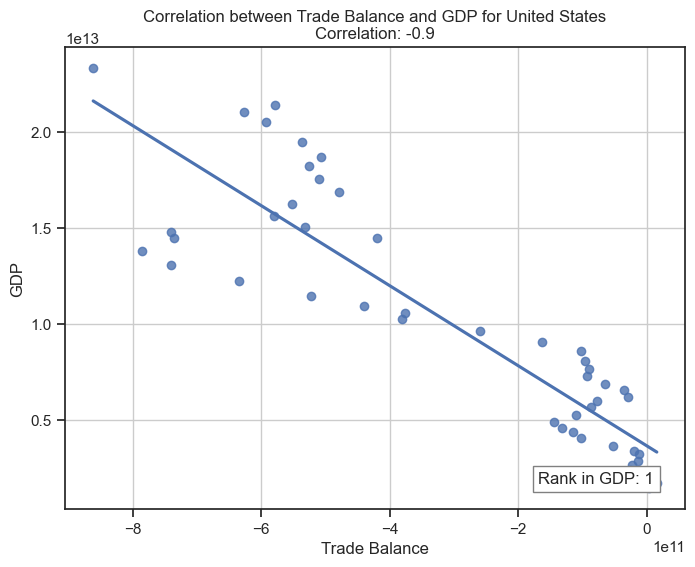

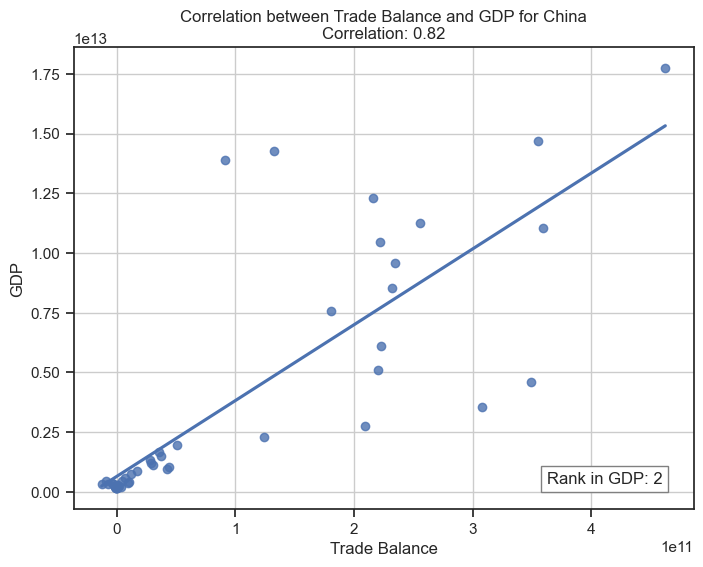

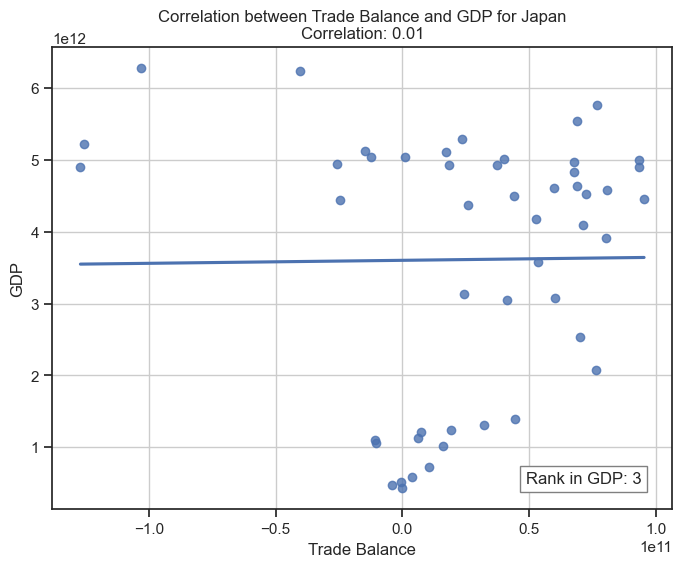

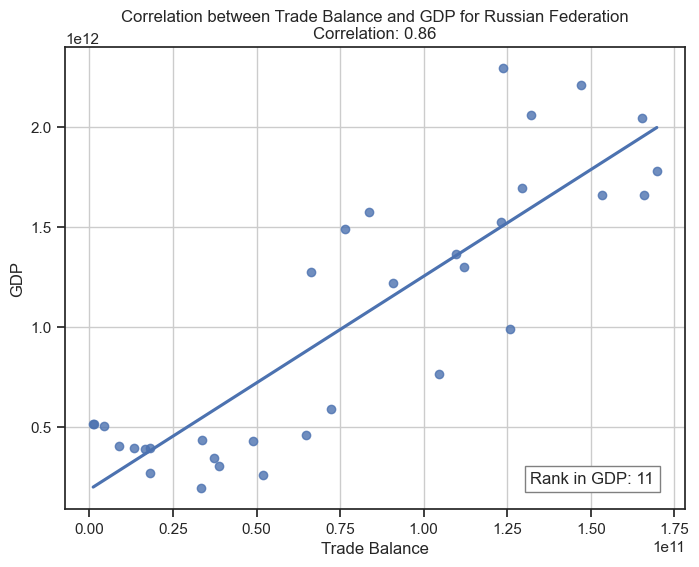

In [51]:

countries = ['United States', 'China', 'Japan', 'Russian Federation']

filtered_data = df[df['Country'].isin(countries)]

# Определим места каждой страны в списке ВВП
ranked_countries = df[df['Year'] == 2021].sort_values('GDP', ascending=False)['Country'].tolist()
country_ranks = {country: ranked_countries.index(country) + 1 for country in countries}

sns.set(style='ticks')
# Итерируемся по выбранным странам
for country in countries:
    if country == 'Russian Federation':
        country_data = filtered_data[filtered_data['Country'] == 'Russian Federation'] # Выбор данных только для России
    else:
        country_data = filtered_data[filtered_data['Country'] == country] # Выбор данных для остальных стран
    
    correlation = country_data['GDP'].corr(country_data['Trade Balance']) # Вычисление коэффициента корреляции
    correlation = np.round(correlation, decimals=2)
    
    plt.figure(figsize=(8, 6))
    sns.regplot(x='Trade Balance', y='GDP', data=country_data, ci=None)
    plt.title(f'Correlation between Trade Balance and GDP for {country}\nCorrelation: {correlation}')
    plt.xlabel('Trade Balance')
    plt.ylabel('GDP')
    plt.grid(True)
    # Добавили на график место(ранг) страны в списке ВВП
    rank = country_ranks[country]
    plt.text(0.95, 0.05, f'Rank in GDP: {rank}', transform=plt.gca().transAxes,
             ha='right', va='bottom', bbox=dict(facecolor='white', edgecolor='gray'))
    
    plt.show()


Мы получили довольно интересный результат. Казалось бы, торговля играет большую роль в формировании ВВП страны. Однако мы видим на примере Японии, что корреляция между ВВП и торговым балансом практически отсутсвует. Также оказалось, что сворешенно неважен и знак торгового баланса (превышает ли экспорт импорт или наоборот). Например, США имеет высокую отрицательную корреляцию, а Китай высокую положительную.

### Предсказание (Линейная регрессия)

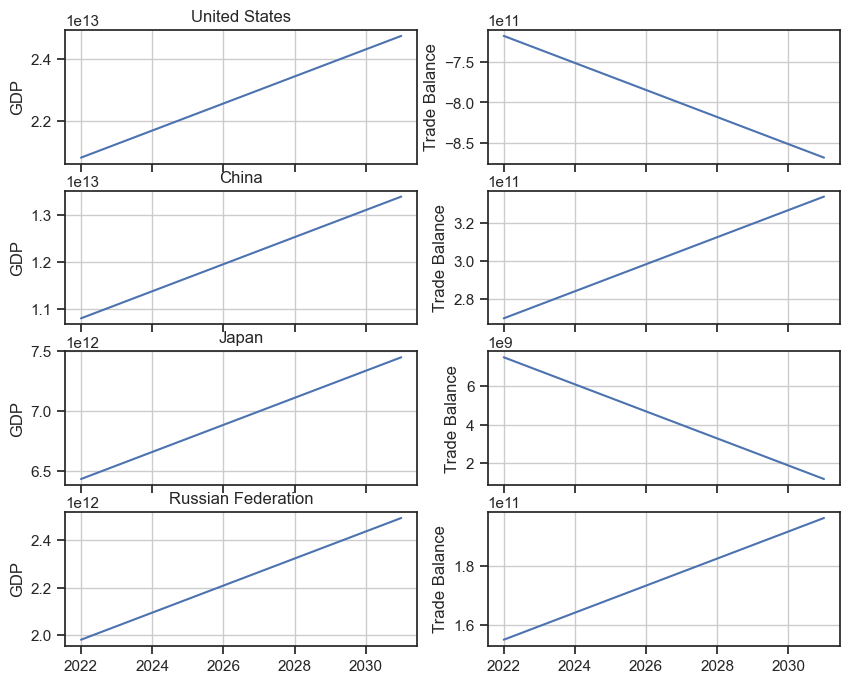

In [63]:
from sklearn.linear_model import LinearRegression

predictions = {}

future_years = range(2022, 2032) # Будем делать предсказание на следующие 10 лет


fig, axs = plt.subplots(len(countries), 2, figsize=(10, 8), sharex=True)

for i, country in enumerate(countries): # Предсказание для каждой страны
    
    country_data = df[df['Country'] == country]

    country_data = country_data.dropna(subset=['GDP', 'Trade Balance']) # Удалим строки с отсутсвующими значениями
    
    features = country_data[['Year']] # Обозначаем переменные для предсказания
    target_gdp = country_data['GDP']
    target_trade_balance = country_data['Trade Balance']
    

    gdp_model = LinearRegression() # Обучение модели для ВВП
    gdp_model.fit(features, target_gdp)
    future_features = pd.DataFrame({'Year': future_years})
    gdp_predictions = gdp_model.predict(future_features)
    
    trade_model = LinearRegression() # Обучение модели для торгового баланса
    trade_model.fit(features, target_trade_balance)
    trade_predictions = trade_model.predict(future_features)
    
    predictions[country] = {'GDP': gdp_predictions, 'Trade Balance': trade_predictions} # Записываем предсказание
    
    # Отрисовываем
    axs[i, 0].plot(future_years, gdp_predictions, label='GDP')
    axs[i, 0].set_ylabel('GDP')
    axs[i, 0].grid(True)
    
    axs[i, 1].plot(future_years, trade_predictions, label='Trade Balance')
    axs[i, 1].set_ylabel('Trade Balance')
    axs[i, 1].grid(True)
    
    axs[i, 0].set_title(country)



Результат предсказания довольно ожидаем. ВВП стран в среднем продолжит расти, торговый баланс будет изменяться в соответсвии с внешней политикой страны.

### Подитог

В этом проекте можно было бы сделать дополнительно много чего интересного, но, к сожалени, это всё, что я успел. Дальнейшие продвижения по проекту будут при подготовке видео-визитки для Иннополиса